In [58]:
import boto3

In [59]:
import pandas as pd
from io import StringIO

In [60]:
# Set up S3 client
client = boto3.client('s3')

In [61]:
bucket_name = 'viamericas-datalake-dev-us-east-1-283731589572-analytics'
path = 'Forecast/Forecast_analysis/forecast_1d_10_09_2023/' # Folder under analysis

In [62]:
# Listing objects 
elements = client.list_objects(Bucket=bucket_name, Prefix=path)

In [63]:
# Initialize an empty list 
dfs = []

In [64]:
# Iterate through each CSV in the S3 path
for obj in elements.get('Contents', []):
#    print(obj)
    # Check if the object is a CSV file
    if obj['Key'].endswith('.csv'):
        # Read CSV content from S3
        response = client.get_object(Bucket=bucket_name, Key=obj['Key'])
        print(obj['Key'])
        csv_content = response['Body'].read().decode('utf-8')

        # Transform CSV content to df
        df = pd.read_csv(StringIO(csv_content))

        dfs.append(df)

Forecast/Forecast_analysis/forecast_1d_10_09_2023/forecast_1d_10_09_2023_2024-01-18T21-19-45Z_part0.csv
Forecast/Forecast_analysis/forecast_1d_10_09_2023/forecast_1d_10_09_2023_2024-01-18T21-19-45Z_part1.csv
Forecast/Forecast_analysis/forecast_1d_10_09_2023/forecast_1d_10_09_2023_2024-01-18T21-19-45Z_part2.csv
Forecast/Forecast_analysis/forecast_1d_10_09_2023/forecast_1d_10_09_2023_2024-01-18T21-19-45Z_part3.csv


In [65]:
final_df = pd.concat(dfs, ignore_index=True)

In [66]:
final_df['date'] = pd.to_datetime(final_df['date']).dt.date

In [67]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   item_id  130 non-null    int64  
 1   country  130 non-null    object 
 2   payer    130 non-null    object 
 3   date     130 non-null    object 
 4   p10      130 non-null    float64
 5   p50      130 non-null    float64
 6   p90      130 non-null    float64
 7   mean     130 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 8.2+ KB


In [68]:
final_df['item_id'].nunique()

130

In [69]:
final_df.payer.unique()

array(['kori', 'speed money', 'banco de credito del peru - bcp (ut)',
       'nairagram', 'bancolombia', 'afro internacional',
       'transferto - thunes', 'nafa', 'empenos del sur (anterior balsas)',
       'farmacias guadalajara (ut)', 'interbank', 'girosmex',
       'bank of philippine islands (bpi)', 'yes bank',
       'banco industrial els (red chapina)', 'banco de guayaquil',
       'teledolar-nic (tn)', 'lafise', 'credomatic',
       'cooperativa cacil (ut)', 'promerica', 'gme',
       'banco pichincha (tn)', 'banco ganadero (bolivia)',
       'banpais (red chapina)', 'unitransfer', 'metrobank',
       'banco daycoval', 'msbb money',
       'farmacias del ahorro (datransfer)', 'muthoot-bangladesh',
       'transpay', 'banpro', 'transfer directo', 'chedraui (appriza)',
       'grupo exito (tn)', 'viamericas usa deposits', 'airpak',
       'depositos bancarios guatemala - ach', 'davivienda',
       'credomatic (bts)', 'afex', 'banco popular honduras (ut)',
       'envios con clab

In [70]:
final_df.head()

,item_id,country,payer,date,p10,p50,p90,mean
0,74,burkina faso,kori,2023-09-11,-974.109375,708.149963,2472.089355,649.356689
1,100,philippines,speed money,2023-09-11,291.139526,2359.601562,4634.386719,2279.986328
2,18,peru,banco de credito del peru - bcp (ut),2023-09-11,119515.500000,148042.656250,174921.500000,146886.234375
3,95,nigeria,nairagram,2023-09-11,21380.242188,35531.910156,50047.707031,34979.367188
4,29,colombia,bancolombia,2023-09-11,384961.062500,454926.093750,520136.187500,452073.187500


In [71]:
final_df.country.unique()

array(['burkina faso', 'philippines', 'peru', 'nigeria', 'colombia',
       'guinea', 'france', 'liberia', 'mexico', 'germany', 'india',
       'el salvador', 'ecuador', 'nicaragua', 'honduras', 'nepal',
       'bolivia', 'haiti', 'brazil', 'bangladesh', 'cameroon',
       'united states', 'guatemala', 'uruguay', 'spain', 'senegal',
       'united states (atm & deposits)', 'thailand', 'benin', 'belgium',
       'jamaica', 'ghana', 'costa rica', 'malaysia', 'dominican republic',
       'indonesia', 'portugal', 'italy', 'sierra leone', 'togo',
       'argentina', "cote d'ivoire (ivory coast)", 'gambia, the',
       'united kingdom', 'chile', 'mali'], dtype=object)

In [72]:
# Grouping by 'payer' and 'country' concatenated for this level of granularity
final_df['payer_country'] = final_df['payer'] + '_' + final_df['country']

In [73]:
final_df['payer_country'].nunique()

130

In [74]:
final_df.country.nunique()

46

In [75]:
final_df['date'] = pd.to_datetime(final_df['date'])

In [76]:
##TOP 10 FORECAST AMOUNTS BETWEEN 11/09/2023 AND 17/09/2023##
total_amount_per_payer =final_df.groupby('payer_country')['mean'].sum()
top_10_payers = total_amount_per_payer.sort_values(ascending=False).head(10)
print(top_10_payers)

payer_country
elektra (mexico)_mexico                 9.782444e+06
bancoppel (appriza)_mexico              5.784186e+06
banrural (ryt)_guatemala                4.663885e+06
banco industrial_guatemala              3.350072e+06
envios con clabe (appriza)_mexico       1.249471e+06
bbva - bancomer (bts)_mexico            9.549251e+05
banco de occidente_honduras             7.337441e+05
banorte (ut)_mexico                     7.278217e+05
telecomm telegrafos (appriza)_mexico    6.859700e+05
banco atlantida_honduras                6.369332e+05
Name: mean, dtype: float64


In [77]:
##TIME INTERVAL FORECAST##
final_df.date.min(),final_df.date.max(),

(Timestamp('2023-09-11 00:00:00'), Timestamp('2023-09-11 00:00:00'))

In [78]:
final_df['mean'].sum()

38339256.104786396

In [79]:
control=final_df.loc[final_df.country=='mexico']

In [80]:
control['mean'].sum()

20734992.17742157

In [81]:
pip install pyathena


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [82]:
from pyathena import connect

In [83]:
# DB Setting
bucket_name = 's3://viamericas-datalake-dev-us-east-1-283731589572-athena/'
origin_name = 'AwsDataCatalog'
database_name= 'analytics'
table_name = 'daily_check'

In [84]:
#Connection
conn = connect(s3_staging_dir=f'{bucket_name}queryresults/',
               region_name='us-east-1')
df_check = pd.read_sql(f'SELECT * FROM {origin_name}.{database_name}.{table_name};', conn)

/tmp/ipykernel_20/3276710735.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_check = pd.read_sql(f'SELECT * FROM {origin_name}.{database_name}.{table_name};', conn)


In [85]:
df_check['date'] = pd.to_datetime(df_check['date'])

In [86]:
df_check.head()

,payer,country,date,tx,amount,coupon_count
0,BANCO AGRICOLA,EL SALVADOR,2021-06-17,707,198615.00,316
1,CHEDRAUI (APPRIZA),MEXICO,2021-06-17,32,17128.00,12
2,24XORO,MEXICO,2023-07-03,53,37002.37,1
3,BANCO DE GUAYAQUIL,ECUADOR,2022-08-16,105,54357.65,1
4,TELECOMM TELEGRAFOS (APPRIZA),MEXICO,2021-11-12,696,391240.62,73


In [87]:
df_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101970 entries, 0 to 101969
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   payer         101970 non-null  object        
 1   country       101970 non-null  object        
 2   date          101970 non-null  datetime64[ns]
 3   tx            101970 non-null  int64         
 4   amount        101970 non-null  float64       
 5   coupon_count  101970 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 4.7+ MB


In [88]:
df_check=df_check.loc[(df_check.date=='2023-09-11')]

In [90]:
df_check.date.min(),df_check.date.max()

(Timestamp('2023-09-11 00:00:00'), Timestamp('2023-09-11 00:00:00'))

In [91]:
df_check.head()

,payer,country,date,tx,amount,coupon_count
1127,ARGENPER,CHILE,2023-09-11,5,605.23,0
1960,BNB,LIBERIA,2023-09-11,1,205.00,0
2120,GLOBAL ENVIOS,ECUADOR,2023-09-11,47,20405.88,0
2290,EXPIRED ORDERS,HONDURAS,2023-09-11,0,0.00,0
2905,TRANSFERTO - THUNES,NIGERIA,2023-09-11,8,5540.00,0


In [92]:
df_check.country.nunique()

37

In [93]:
df_check.payer.nunique()

93

In [94]:
df_check.amount.sum()

34567566.59

In [95]:
control2=df_check.loc[df_check.country=='MEXICO']

In [96]:
control2.amount.sum()

17073946.44

In [97]:
df_check.country.unique()

array(['CHILE', 'LIBERIA', 'ECUADOR', 'HONDURAS', 'NIGERIA', 'NICARAGUA',
       'UNITED STATES (ATM & DEPOSITS)', 'GERMANY', 'ARGENTINA',
       'PHILIPPINES', 'COLOMBIA', 'GUATEMALA', 'BOLIVIA', 'SENEGAL',
       'BANGLADESH', 'JAMAICA', 'COSTA RICA', 'SIERRA LEONE', 'PERU',
       "COTE D'IVOIRE (IVORY COAST)", 'MEXICO', 'EL SALVADOR', 'BRAZIL',
       'NEPAL', 'DOMINICAN REPUBLIC', 'SPAIN', 'UNITED STATES', 'HAITI',
       'GUINEA', 'INDONESIA', 'TOGO', 'GHANA', 'MALI', 'GAMBIA, THE',
       'CAMEROON', 'INDIA', 'PORTUGAL'], dtype=object)

In [98]:
# Grouping by 'payer' and 'country' concatenated for this level of granularity
df_check['payer_country'] = df_check['payer'] + '_' + df_check['country']

In [99]:
##TOP 10 DAILY_CHECK AMOUNTS BETWEEN 21/03/2023 AND 28/03/2023##
total_amount_per_payer2 =df_check.groupby('payer_country')['amount'].sum()
top_10_payers2 = total_amount_per_payer2.sort_values(ascending=False).head(10)
print(top_10_payers2)

payer_country
ELEKTRA (MEXICO)_MEXICO              8069372.31
BANCOPPEL (APPRIZA)_MEXICO           4652243.12
BANRURAL (RYT)_GUATEMALA             4334444.87
BANCO INDUSTRIAL_GUATEMALA           3252755.85
ENVIOS CON CLABE (APPRIZA)_MEXICO    1079280.57
BBVA - BANCOMER (BTS)_MEXICO          844029.30
BANCO DE OCCIDENTE_HONDURAS           709620.92
G Y T CONTINENTAL_GUATEMALA           606650.23
BANORTE (UT)_MEXICO                   597375.97
BANCO ATLANTIDA_HONDURAS              536973.24
Name: amount, dtype: float64


In [100]:
final_df.country.unique()

array(['burkina faso', 'philippines', 'peru', 'nigeria', 'colombia',
       'guinea', 'france', 'liberia', 'mexico', 'germany', 'india',
       'el salvador', 'ecuador', 'nicaragua', 'honduras', 'nepal',
       'bolivia', 'haiti', 'brazil', 'bangladesh', 'cameroon',
       'united states', 'guatemala', 'uruguay', 'spain', 'senegal',
       'united states (atm & deposits)', 'thailand', 'benin', 'belgium',
       'jamaica', 'ghana', 'costa rica', 'malaysia', 'dominican republic',
       'indonesia', 'portugal', 'italy', 'sierra leone', 'togo',
       'argentina', "cote d'ivoire (ivory coast)", 'gambia, the',
       'united kingdom', 'chile', 'mali'], dtype=object)

In [106]:
final_df = final_df.applymap(lambda x: x.upper() if isinstance(x, str) else x)

/tmp/ipykernel_20/2399063668.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  final_df = final_df.applymap(lambda x: x.upper() if isinstance(x, str) else x)


In [107]:
final_df.country.unique()

array(['BURKINA FASO', 'PHILIPPINES', 'PERU', 'NIGERIA', 'COLOMBIA',
       'GUINEA', 'FRANCE', 'LIBERIA', 'MEXICO', 'GERMANY', 'INDIA',
       'EL SALVADOR', 'ECUADOR', 'NICARAGUA', 'HONDURAS', 'NEPAL',
       'BOLIVIA', 'HAITI', 'BRAZIL', 'BANGLADESH', 'CAMEROON',
       'UNITED STATES', 'GUATEMALA', 'URUGUAY', 'SPAIN', 'SENEGAL',
       'UNITED STATES (ATM & DEPOSITS)', 'THAILAND', 'BENIN', 'BELGIUM',
       'JAMAICA', 'GHANA', 'COSTA RICA', 'MALAYSIA', 'DOMINICAN REPUBLIC',
       'INDONESIA', 'PORTUGAL', 'ITALY', 'SIERRA LEONE', 'TOGO',
       'ARGENTINA', "COTE D'IVOIRE (IVORY COAST)", 'GAMBIA, THE',
       'UNITED KINGDOM', 'CHILE', 'MALI'], dtype=object)

In [108]:
df_forecast = pd.merge(df_check, final_df, on=['date','payer','country'], how='outer', indicator=True)

In [109]:
df_forecast._merge.value_counts()

_merge
both          107
right_only     23
left_only      10
Name: count, dtype: int64

In [110]:
control3=df_forecast.loc[df_forecast._merge=='left_only']
control3.payer.unique()

array(['BNB', 'EXPIRED ORDERS'], dtype=object)

In [111]:
control4=df_forecast.loc[df_forecast._merge=='right_only']
control4.payer.unique()

array(['KORI', 'AFRO INTERNACIONAL', 'TRANSFERTO - THUNES', 'NAFA',
       'BANCO INDUSTRIAL ELS (RED CHAPINA)', 'TRANSPAY', 'AFEX',
       'CAJA POPULAR MEXICANA (UT)', 'VIAMERICAS USA DEPOSITS',
       'MERCHANTRADE', 'VTN', 'M. LHUILLIER', 'TIGO MONEY', 'ZEEPAY',
       'ARGENPER'], dtype=object)

In [113]:
##ESTO SE NOS ESTARÍAMOS PERDIENDO EN 200 MILLONES (0.25%), ENCONTRAR DIFERENCIAS LUEGO, POR AHORA AVANZAR EN MAPES##
## CUIDADO QUE PUEDE SUCEDER TAMBIEN QUE LOS PAYERS PEQUEÑOS, NO OPEREN AGÚN DIA Y ESO EXPLIQUE QUE NO HAYA MERGE PERFECTO##
control4['mean'].sum()

7561.9407582282

In [114]:
control4.country.unique()

array(['BURKINA FASO', 'GUINEA', 'FRANCE', 'LIBERIA', 'EL SALVADOR',
       'CAMEROON', 'URUGUAY', 'MEXICO', 'SENEGAL',
       'UNITED STATES (ATM & DEPOSITS)', 'THAILAND', 'BENIN', 'BELGIUM',
       'NIGERIA', 'MALAYSIA', 'PHILIPPINES', 'ITALY', 'TOGO',
       "COTE D'IVOIRE (IVORY COAST)", 'BOLIVIA', 'UNITED KINGDOM'],
      dtype=object)

In [115]:
control5=df_forecast.loc[df_forecast._merge=='both']
control5.payer.unique()

array(['ARGENPER', 'GLOBAL ENVIOS', 'TRANSFERTO - THUNES',
       'BANCO POPULAR HONDURAS (UT)', 'MASTERCARD ATM NETWORK',
       'BANK OF PHILIPPINE ISLANDS (BPI)', 'PROMERICA (GUA)',
       'BANCO GANADERO (BOLIVIA)', 'NAFA', 'COOPERATIVA FRONTERIZA (UT)',
       'DEPOSITOS BANCARIOS GUATEMALA - ACH', 'MERCHANTRADE', 'JMMB',
       'CEBUANA LHUILLIER', 'BANHCAFE', 'AFRO INTERNACIONAL', 'AFEX',
       'BNB', 'CHEDRAUI (APPRIZA)', 'TRANSPAY', 'BBVA - BANCOMER (BTS)',
       'ELEKTRA (MEXICO)', 'COOPERATIVA CACIL (UT)',
       'BANCO PICHINCHA (TN)', 'BANPRO',
       'BANCO DAVIVIENDA SALVADORENO (BTS)', 'SORIANA', 'INTERMEX',
       'G Y T CONTINENTAL', 'FICOHSA', 'ABANK (TN)', 'CREDOMATIC (BTS)',
       'FEDECREDITO (RYT)', 'BANCO DAYCOVAL', 'AIRPAK', 'BANCO BISA',
       'BANCO RENDIMENTO', 'BANCO DEL AUSTRO', 'GME', 'ELEKTRA (BTS)',
       'BAM - BANCO AGROMERCANTIL (UT)', 'BANRURAL (RYT)', 'PROMERICA',
       'OXXO (TN)', '24XORO', 'EMPENOS DEL SUR (ANTERIOR BALSAS)',
       'BANCO

In [116]:
#7% DIF A UNA SEMANA##
control5.amount.sum(), control5['mean'].sum()

(34567269.59, 38331694.16402817)

In [117]:
df_forecast.amount.sum()

34567566.59

In [118]:
##BANCO POPULAR HONDURAS (UT)en df_check#
control6= df_check.loc[df_check.payer=='BANCO POPULAR HONDURAS (UT)']
control6.head(7)

,payer,country,date,tx,amount,coupon_count,payer_country
4300,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-09-11,0,0.0,0,BANCO POPULAR HONDURAS (UT)_HONDURAS


In [119]:
##BANCO POPULAR HONDURAS (UT)en df_forecast#
control7= df_forecast.loc[df_forecast.payer=='BANCO POPULAR HONDURAS (UT)']
control7.head(7)

,payer,country,date,tx,amount,coupon_count,payer_country_x,item_id,p10,p50,p90,mean,payer_country_y,_merge
6,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-09-11,0.0,0.0,0.0,BANCO POPULAR HONDURAS (UT)_HONDURAS,27.0,-207.143738,658.348999,1621.287476,625.207947,BANCO POPULAR HONDURAS (UT)_HONDURAS,both


In [229]:
##LA DIFERENCIAS SE EXPLICAN PORQUE LOS PAYERS PEQUEÑOS NO OPERAN TODOS LOS DIAS Y FORECAST LANZA UN PRONOSTICO A 7D (IMPUTAR ESOS DIAS)

In [120]:
df_forecast=df_forecast.loc[df_forecast._merge!='left_only']

In [121]:
df_forecast.amount.fillna(0, inplace=True)
df_forecast.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, 0 to 139
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   payer            130 non-null    object        
 1   country          130 non-null    object        
 2   date             130 non-null    datetime64[ns]
 3   tx               107 non-null    float64       
 4   amount           130 non-null    float64       
 5   coupon_count     107 non-null    float64       
 6   payer_country_x  107 non-null    object        
 7   item_id          130 non-null    float64       
 8   p10              130 non-null    float64       
 9   p50              130 non-null    float64       
 10  p90              130 non-null    float64       
 11  mean             130 non-null    float64       
 12  payer_country_y  130 non-null    object        
 13  _merge           130 non-null    category      
dtypes: category(1), datetime64[ns](1), float64(8), 

In [122]:
df_forecast_final=df_forecast.loc[:, ['payer','country','date','amount','p10','p50','p90','mean']]

In [123]:
df_forecast_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, 0 to 139
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   payer    130 non-null    object        
 1   country  130 non-null    object        
 2   date     130 non-null    datetime64[ns]
 3   amount   130 non-null    float64       
 4   p10      130 non-null    float64       
 5   p50      130 non-null    float64       
 6   p90      130 non-null    float64       
 7   mean     130 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 9.1+ KB


In [135]:
# Grouping by 'payer' and 'country' concatenated for this level of granularity
df_forecast_final['payer_country'] = df_forecast_final['payer'] + '_' + df_forecast_final['country']

In [136]:
df_forecast_final.head()

,payer,country,date,amount,p10,p50,p90,mean,payer_country
0,ARGENPER,CHILE,2023-09-11,605.23,-392.479736,1558.251343,3100.829102,1593.626099,ARGENPER_CHILE
2,GLOBAL ENVIOS,ECUADOR,2023-09-11,20405.88,7362.058105,15601.994141,23585.757812,15272.608398,GLOBAL ENVIOS_ECUADOR
4,TRANSFERTO - THUNES,NIGERIA,2023-09-11,5540.00,72.148560,1462.763428,3273.524414,1585.967285,TRANSFERTO - THUNES_NIGERIA
7,MASTERCARD ATM NETWORK,UNITED STATES (ATM & DEPOSITS),2023-09-11,4180.00,-2165.452148,-707.594543,720.599426,-732.886475,MASTERCARD ATM NETWORK_UNITED STATES (ATM & DE...
8,TRANSFERTO - THUNES,GERMANY,2023-09-11,222.51,-67.421722,357.945984,806.335938,358.532532,TRANSFERTO - THUNES_GERMANY


In [236]:
## MAPE A 1 DÍA POR PAYER##

In [237]:
##GENERAMOS EL ERROR DE PRONOSTICO##
##ELIMINAMOS LOS CASOS CON AMOUNT==0 PORQUE GENERA UNA INDETERMINACIÓN EN EL CÁLCULO (A/0=INF)
## Y SI IMPUTAMOS 1 EN VEZ DE CERO???###

In [238]:
## POR LO PRONTO ELIMINO LOS QUE TIENEN AMOUNT CERO Y EL MAPE ESTARÁ DEFINIDO BAJO ESA CONDICION##

In [137]:
df_forecast_final=df_forecast_final.loc[df_forecast_final.amount!=0]
df_forecast_final.shape

(104, 9)

In [138]:
df_forecast_final.head()

,payer,country,date,amount,p10,p50,p90,mean,payer_country
0,ARGENPER,CHILE,2023-09-11,605.23,-392.479736,1558.251343,3100.829102,1593.626099,ARGENPER_CHILE
2,GLOBAL ENVIOS,ECUADOR,2023-09-11,20405.88,7362.058105,15601.994141,23585.757812,15272.608398,GLOBAL ENVIOS_ECUADOR
4,TRANSFERTO - THUNES,NIGERIA,2023-09-11,5540.00,72.148560,1462.763428,3273.524414,1585.967285,TRANSFERTO - THUNES_NIGERIA
7,MASTERCARD ATM NETWORK,UNITED STATES (ATM & DEPOSITS),2023-09-11,4180.00,-2165.452148,-707.594543,720.599426,-732.886475,MASTERCARD ATM NETWORK_UNITED STATES (ATM & DE...
8,TRANSFERTO - THUNES,GERMANY,2023-09-11,222.51,-67.421722,357.945984,806.335938,358.532532,TRANSFERTO - THUNES_GERMANY


In [139]:
control=df_forecast_final.loc[df_forecast_final.country=='MEXICO']
control

,payer,country,date,amount,p10,p50,p90,mean,payer_country
28,CHEDRAUI (APPRIZA),MEXICO,2023-09-11,4327.00,5.507622e+03,8.514807e+03,1.117043e+04,8.107100e+03,CHEDRAUI (APPRIZA)_MEXICO
30,BBVA - BANCOMER (BTS),MEXICO,2023-09-11,844029.30,8.574697e+05,9.591559e+05,1.050682e+06,9.549251e+05,BBVA - BANCOMER (BTS)_MEXICO
31,ELEKTRA (MEXICO),MEXICO,2023-09-11,8069372.31,9.114500e+06,9.870685e+06,1.040969e+07,9.782444e+06,ELEKTRA (MEXICO)_MEXICO
36,SORIANA,MEXICO,2023-09-11,152845.38,1.608463e+05,1.827907e+05,2.042406e+05,1.824075e+05,SORIANA_MEXICO
37,INTERMEX,MEXICO,2023-09-11,391763.62,3.798661e+05,4.196786e+05,4.588262e+05,4.189834e+05,INTERMEX_MEXICO
44,AIRPAK,MEXICO,2023-09-11,91414.35,8.995931e+04,1.085209e+05,1.259334e+05,1.077667e+05,AIRPAK_MEXICO
53,OXXO (TN),MEXICO,2023-09-11,39789.00,3.627915e+04,4.532615e+04,5.385703e+04,4.495955e+04,OXXO (TN)_MEXICO
54,24XORO,MEXICO,2023-09-11,39428.11,4.197520e+04,5.354927e+04,6.456697e+04,5.308257e+04,24XORO_MEXICO
55,EMPENOS DEL SUR (ANTERIOR BALSAS),MEXICO,2023-09-11,13777.68,1.627147e+04,2.254557e+04,2.863665e+04,2.229501e+04,EMPENOS DEL SUR (ANTERIOR BALSAS)_MEXICO
61,WALDOS (APPRIZA),MEXICO,2023-09-11,5360.00,3.307742e+03,6.485627e+03,9.858757e+03,6.362640e+03,WALDOS (APPRIZA)_MEXICO


In [140]:
###MAPE FORECAST A 1 DÍA##
forecast_1d=df_forecast_final.loc[df_forecast_final.date=='2023-09-11']

In [141]:
forecast_1d.shape

(104, 9)

In [142]:
forecast_1d["pe"] = abs((forecast_1d.amount - forecast_1d['mean']) / forecast_1d.amount)

In [143]:
forecast_1d.pe.min(), forecast_1d.pe.max()

(0.016681374380555336, 2.485746002197083)

In [144]:
forecast_1d.head(2)

,payer,country,date,amount,p10,p50,p90,mean,payer_country,pe
0,ARGENPER,CHILE,2023-09-11,605.23,-392.479736,1558.251343,3100.829102,1593.626099,ARGENPER_CHILE,1.633092
2,GLOBAL ENVIOS,ECUADOR,2023-09-11,20405.88,7362.058105,15601.994141,23585.757812,15272.608398,GLOBAL ENVIOS_ECUADOR,0.251558


In [145]:
forecast_1d.sort_values('amount', ascending=False).head(10)

,payer,country,date,amount,p10,p50,p90,mean,payer_country,pe
31,ELEKTRA (MEXICO),MEXICO,2023-09-11,8069372.31,9.114500e+06,9.870685e+06,1.040969e+07,9.782444e+06,ELEKTRA (MEXICO)_MEXICO,0.212293
96,BANCOPPEL (APPRIZA),MEXICO,2023-09-11,4652243.12,5.382877e+06,5.791124e+06,6.186863e+06,5.784186e+06,BANCOPPEL (APPRIZA)_MEXICO,0.243311
51,BANRURAL (RYT),GUATEMALA,2023-09-11,4334444.87,4.345258e+06,4.669500e+06,4.986834e+06,4.663885e+06,BANRURAL (RYT)_GUATEMALA,0.076005
107,BANCO INDUSTRIAL,GUATEMALA,2023-09-11,3252755.85,3.101114e+06,3.384185e+06,3.621875e+06,3.350072e+06,BANCO INDUSTRIAL_GUATEMALA,0.029918
98,ENVIOS CON CLABE (APPRIZA),MEXICO,2023-09-11,1079280.57,1.117258e+06,1.255207e+06,1.379509e+06,1.249471e+06,ENVIOS CON CLABE (APPRIZA)_MEXICO,0.157689
30,BBVA - BANCOMER (BTS),MEXICO,2023-09-11,844029.30,8.574697e+05,9.591559e+05,1.050682e+06,9.549251e+05,BBVA - BANCOMER (BTS)_MEXICO,0.131389
109,BANCO DE OCCIDENTE,HONDURAS,2023-09-11,709620.92,6.534869e+05,7.371911e+05,8.138502e+05,7.337441e+05,BANCO DE OCCIDENTE_HONDURAS,0.033994
38,G Y T CONTINENTAL,GUATEMALA,2023-09-11,606650.23,5.047177e+05,5.700429e+05,6.254591e+05,5.621121e+05,G Y T CONTINENTAL_GUATEMALA,0.073417
100,BANORTE (UT),MEXICO,2023-09-11,597375.97,6.532610e+05,7.310534e+05,8.012489e+05,7.278217e+05,BANORTE (UT)_MEXICO,0.218365
74,BANCO ATLANTIDA,HONDURAS,2023-09-11,536973.24,5.651982e+05,6.400132e+05,7.085661e+05,6.369332e+05,BANCO ATLANTIDA_HONDURAS,0.186154


In [146]:
##MAPE PROMEDIO A 1 D (para los que tienen MAPE definido)
forecast_1d.pe.mean()

0.3265929756088966

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


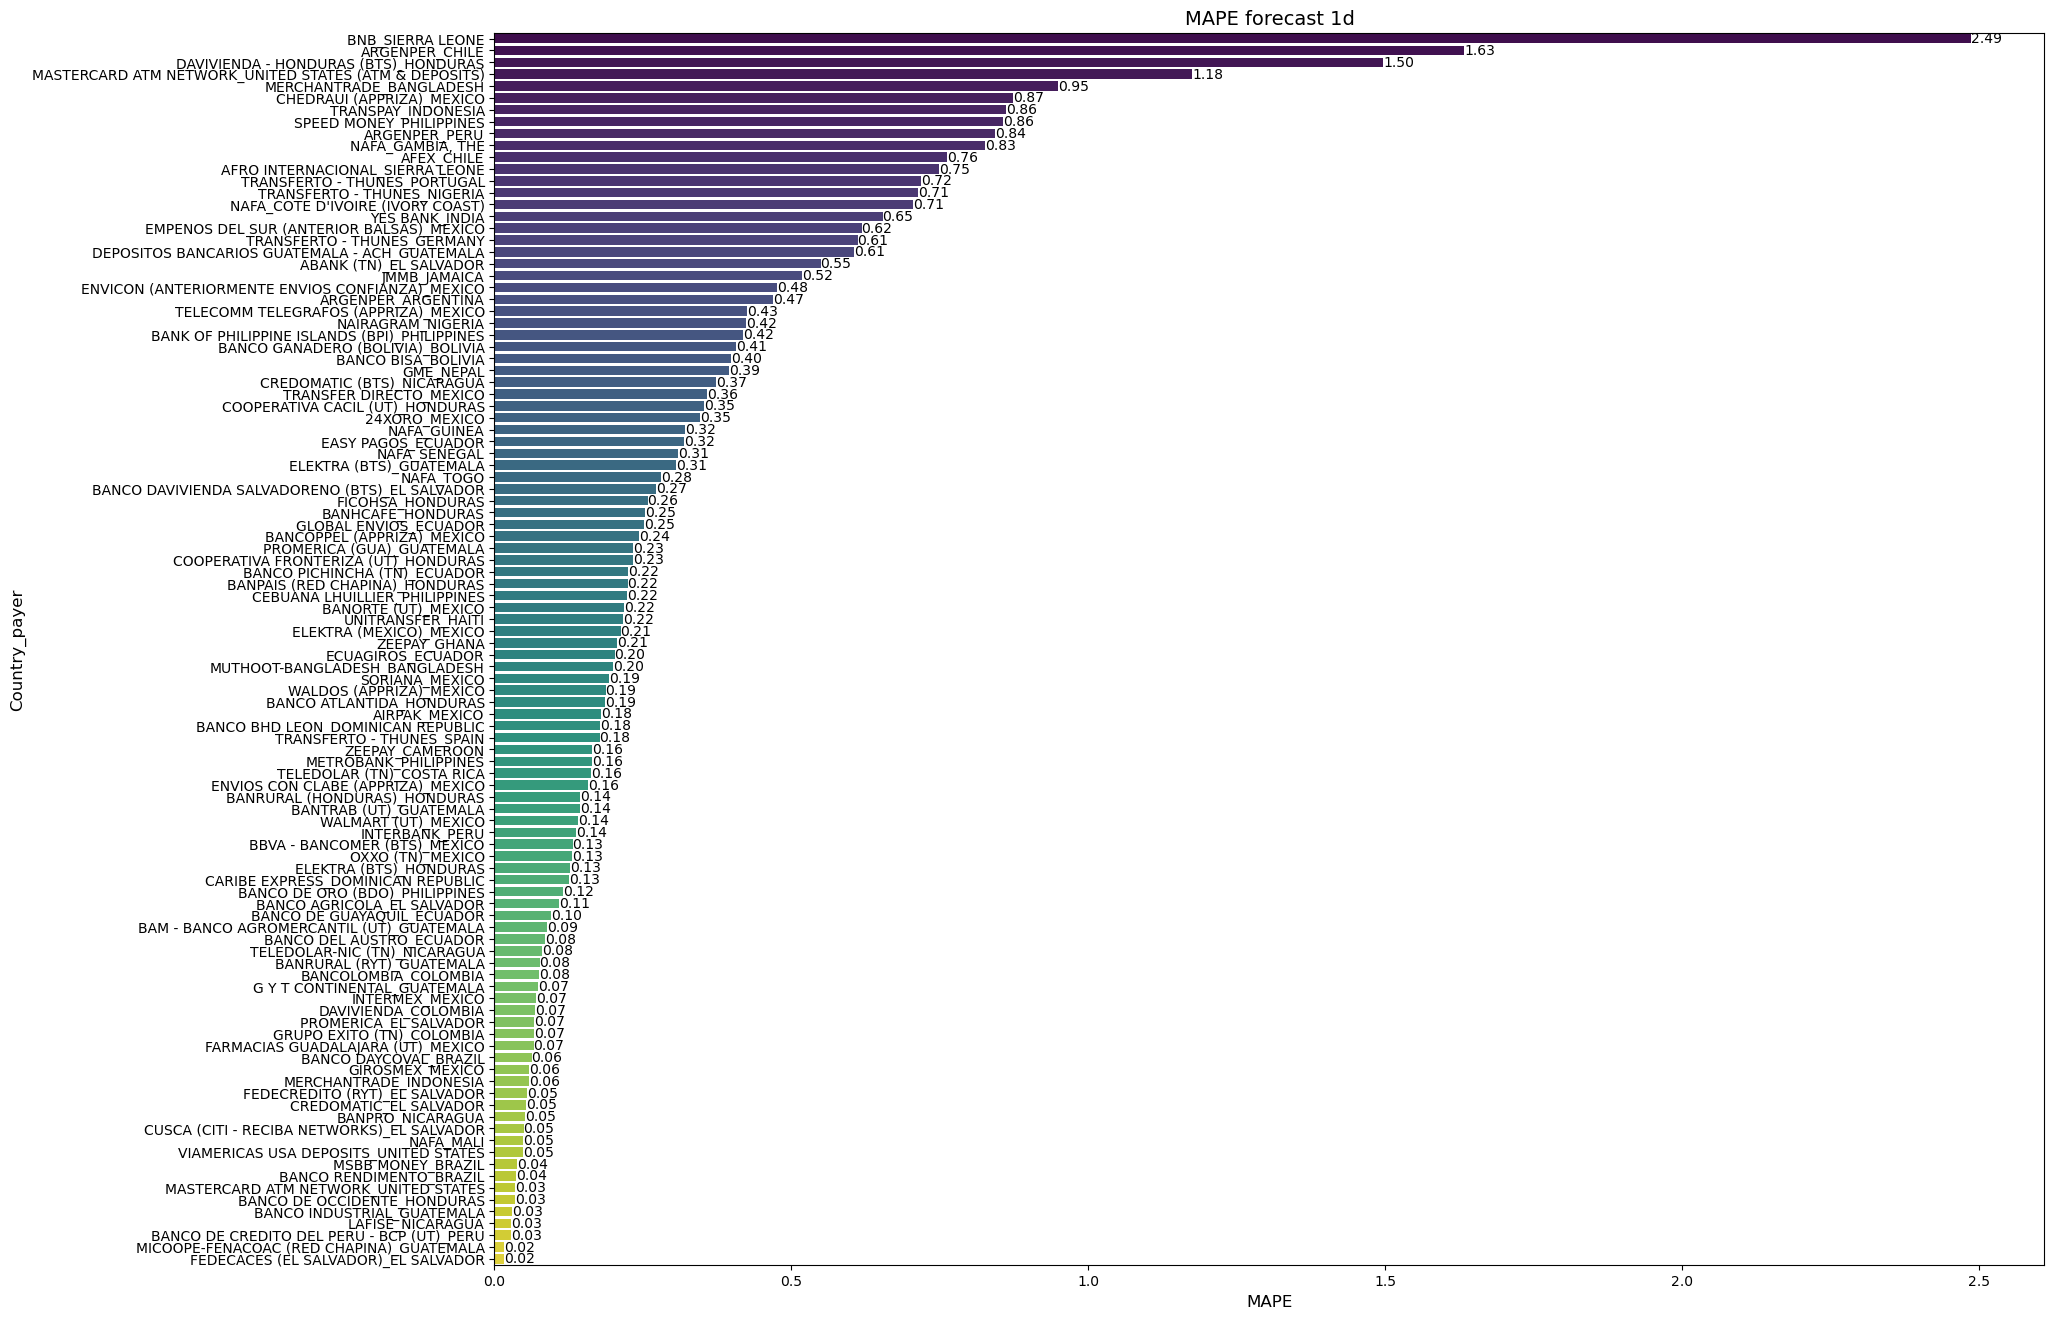

In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

forecast_1d = forecast_1d.sort_values(by='pe', ascending=False)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20,16))
bar_plot = sns.barplot(x='pe', y='payer_country', data=forecast_1d, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('MAPE', fontsize=12)
plt.ylabel('Country_payer', fontsize=12)
plt.title('MAPE forecast 1d', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(forecast_1d['pe']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()

In [148]:
##FORECAST 1D MAPE PROMEDIO SIMPLE POR PAÍS##
forecast_1d_country = forecast_1d.groupby('country')['pe'].mean().reset_index()
forecast_1d_country.sort_values('pe')

,country,pe
34,UNITED STATES,0.041628
3,BRAZIL,0.045444
22,MALI,0.048694
6,COLOMBIA,0.070514
25,NICARAGUA,0.133279
11,EL SALVADOR,0.146304
9,DOMINICAN REPUBLIC,0.151523
7,COSTA RICA,0.162205
4,CAMEROON,0.163950
15,GUATEMALA,0.174889


/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


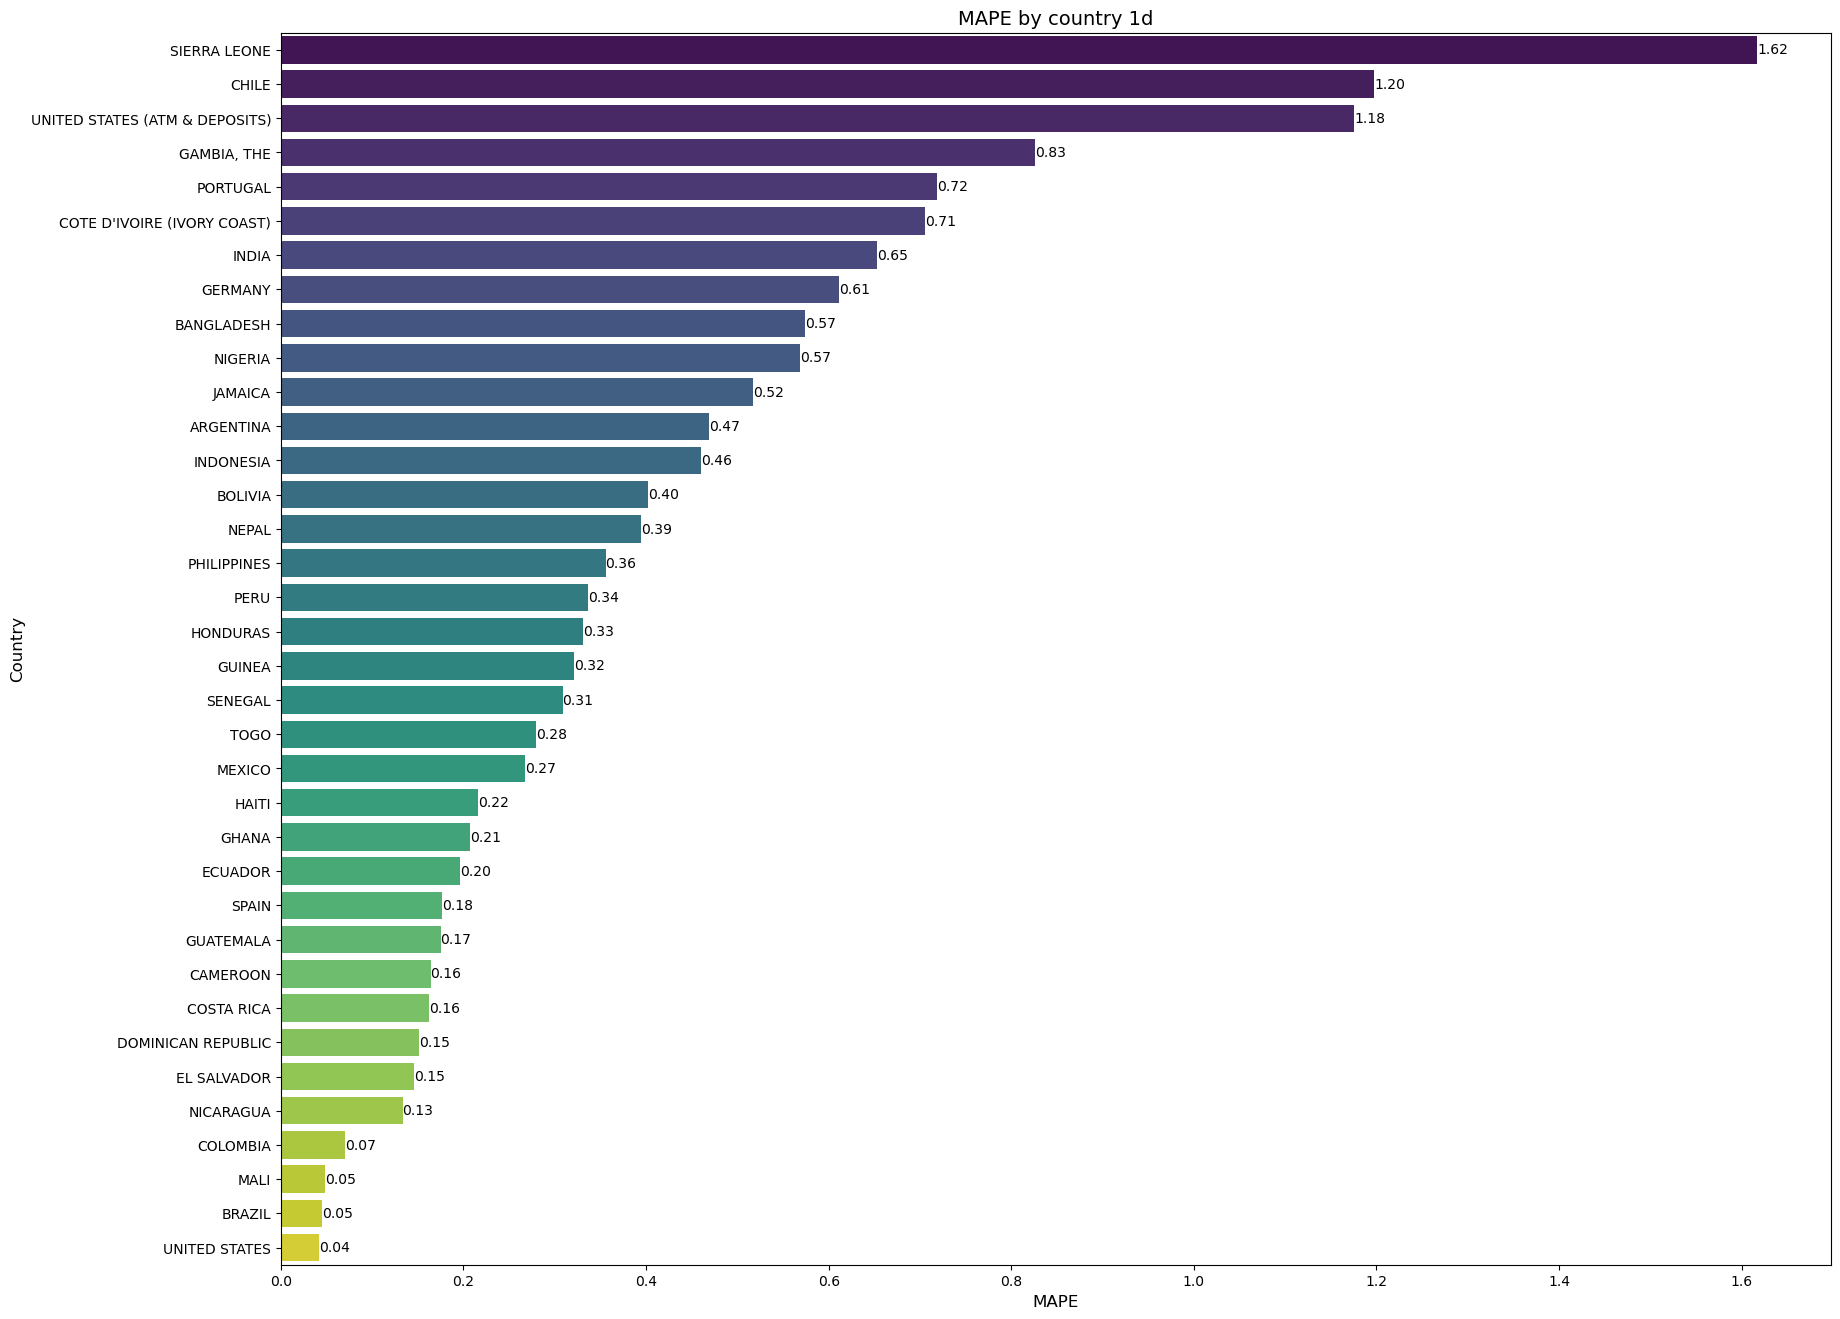

In [149]:
forecast_1d_country=forecast_1d_country.sort_values('pe', ascending=False)
# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20,16))
bar_plot = sns.barplot(x='pe', y='country', data=forecast_1d_country, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('MAPE', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('MAPE by country 1d', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(forecast_1d_country['pe']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()

In [150]:
##WAPE A 1 DÍA GENERAL##
forecast_1d["ae"] = abs((forecast_1d.amount - forecast_1d['mean']))
print(forecast_1d.ae.sum() / forecast_1d.amount.sum())

0.15070213247275194


In [ ]:
##WAPE POR PAÍSES##

In [151]:
wape_country_f1d = forecast_1d.groupby('country').apply(lambda x: (x['ae'].sum() / x['amount'].sum())).reset_index(name='wape')

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


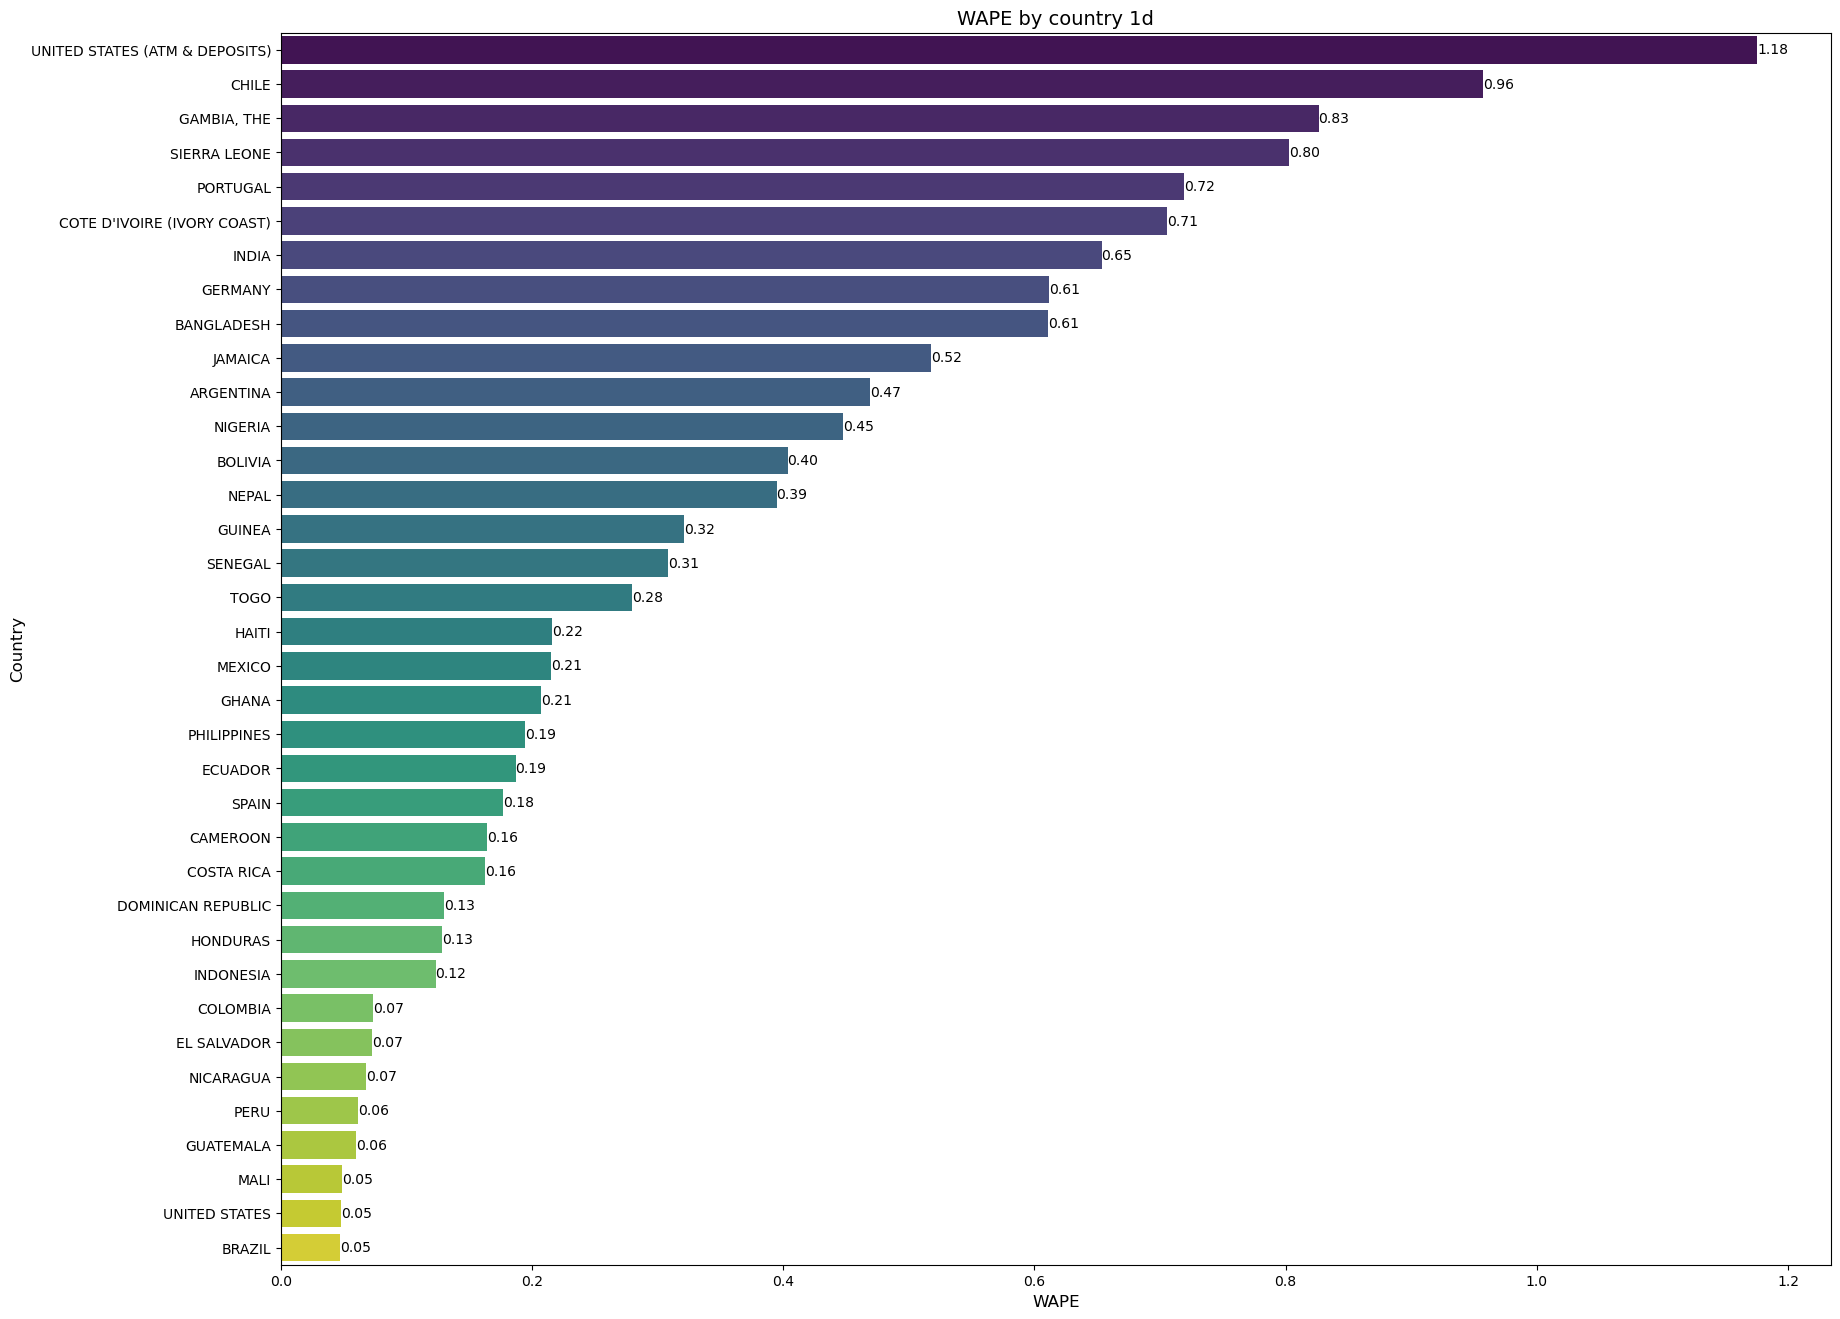

In [152]:
wape_country_f1d.sort_values('wape', inplace=True, ascending=False)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20,16))
bar_plot = sns.barplot(x='wape', y='country', data=wape_country_f1d, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('WAPE', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('WAPE by country 1d', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(wape_country_f1d['wape']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()


In [ ]:
END

In [269]:
##FORECAST 3DIAS  MAPE PROMEDIO SIMPLE POR PAÍS##
forecast_3d_country = forecast_3d.groupby('country')['pe'].mean().reset_index()
forecast_3d_country=forecast_3d_country.sort_values('pe', ascending=False)

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


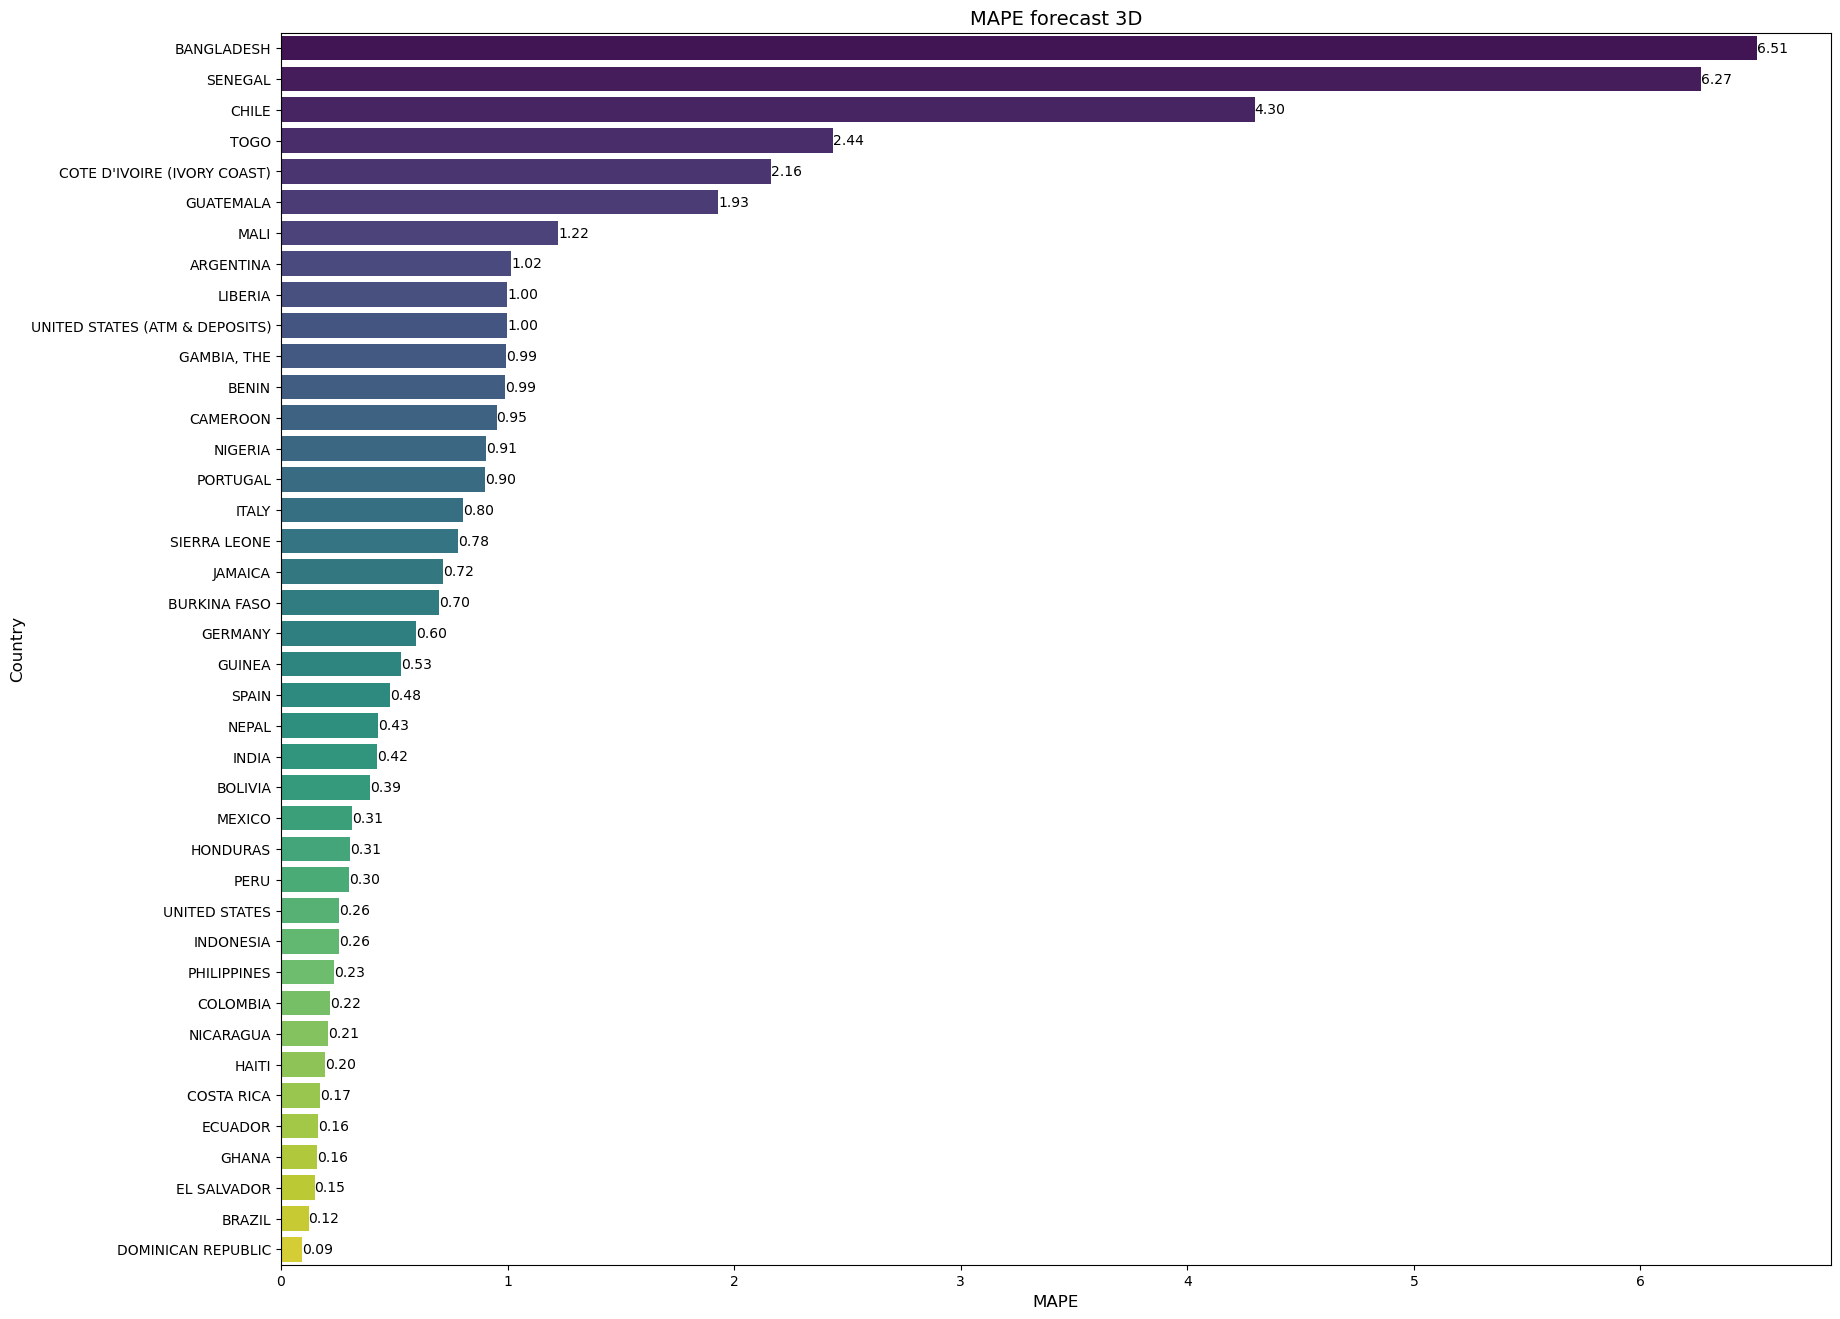

In [270]:
# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20,16))
bar_plot = sns.barplot(x='pe', y='country', data=forecast_3d_country, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('MAPE', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('MAPE forecast 3D', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(forecast_3d_country['pe']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()

In [271]:
##WAPE A 3 DÍAS GENERAL##
forecast_3d["ae"] = abs((forecast_3d.amount - forecast_3d['mean']))
print(forecast_3d.ae.sum() / forecast_3d.amount.sum())

0.1724466791685904


/tmp/ipykernel_550/4007322800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_3d["ae"] = abs((forecast_3d.amount - forecast_3d['mean']))


In [ ]:
##WAPE POR PAÍSES 3d##

In [272]:
wape_country_f3d = forecast_3d.groupby('country').apply(lambda x: (x['ae'].sum() / x['amount'].sum())).reset_index(name='wape')

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


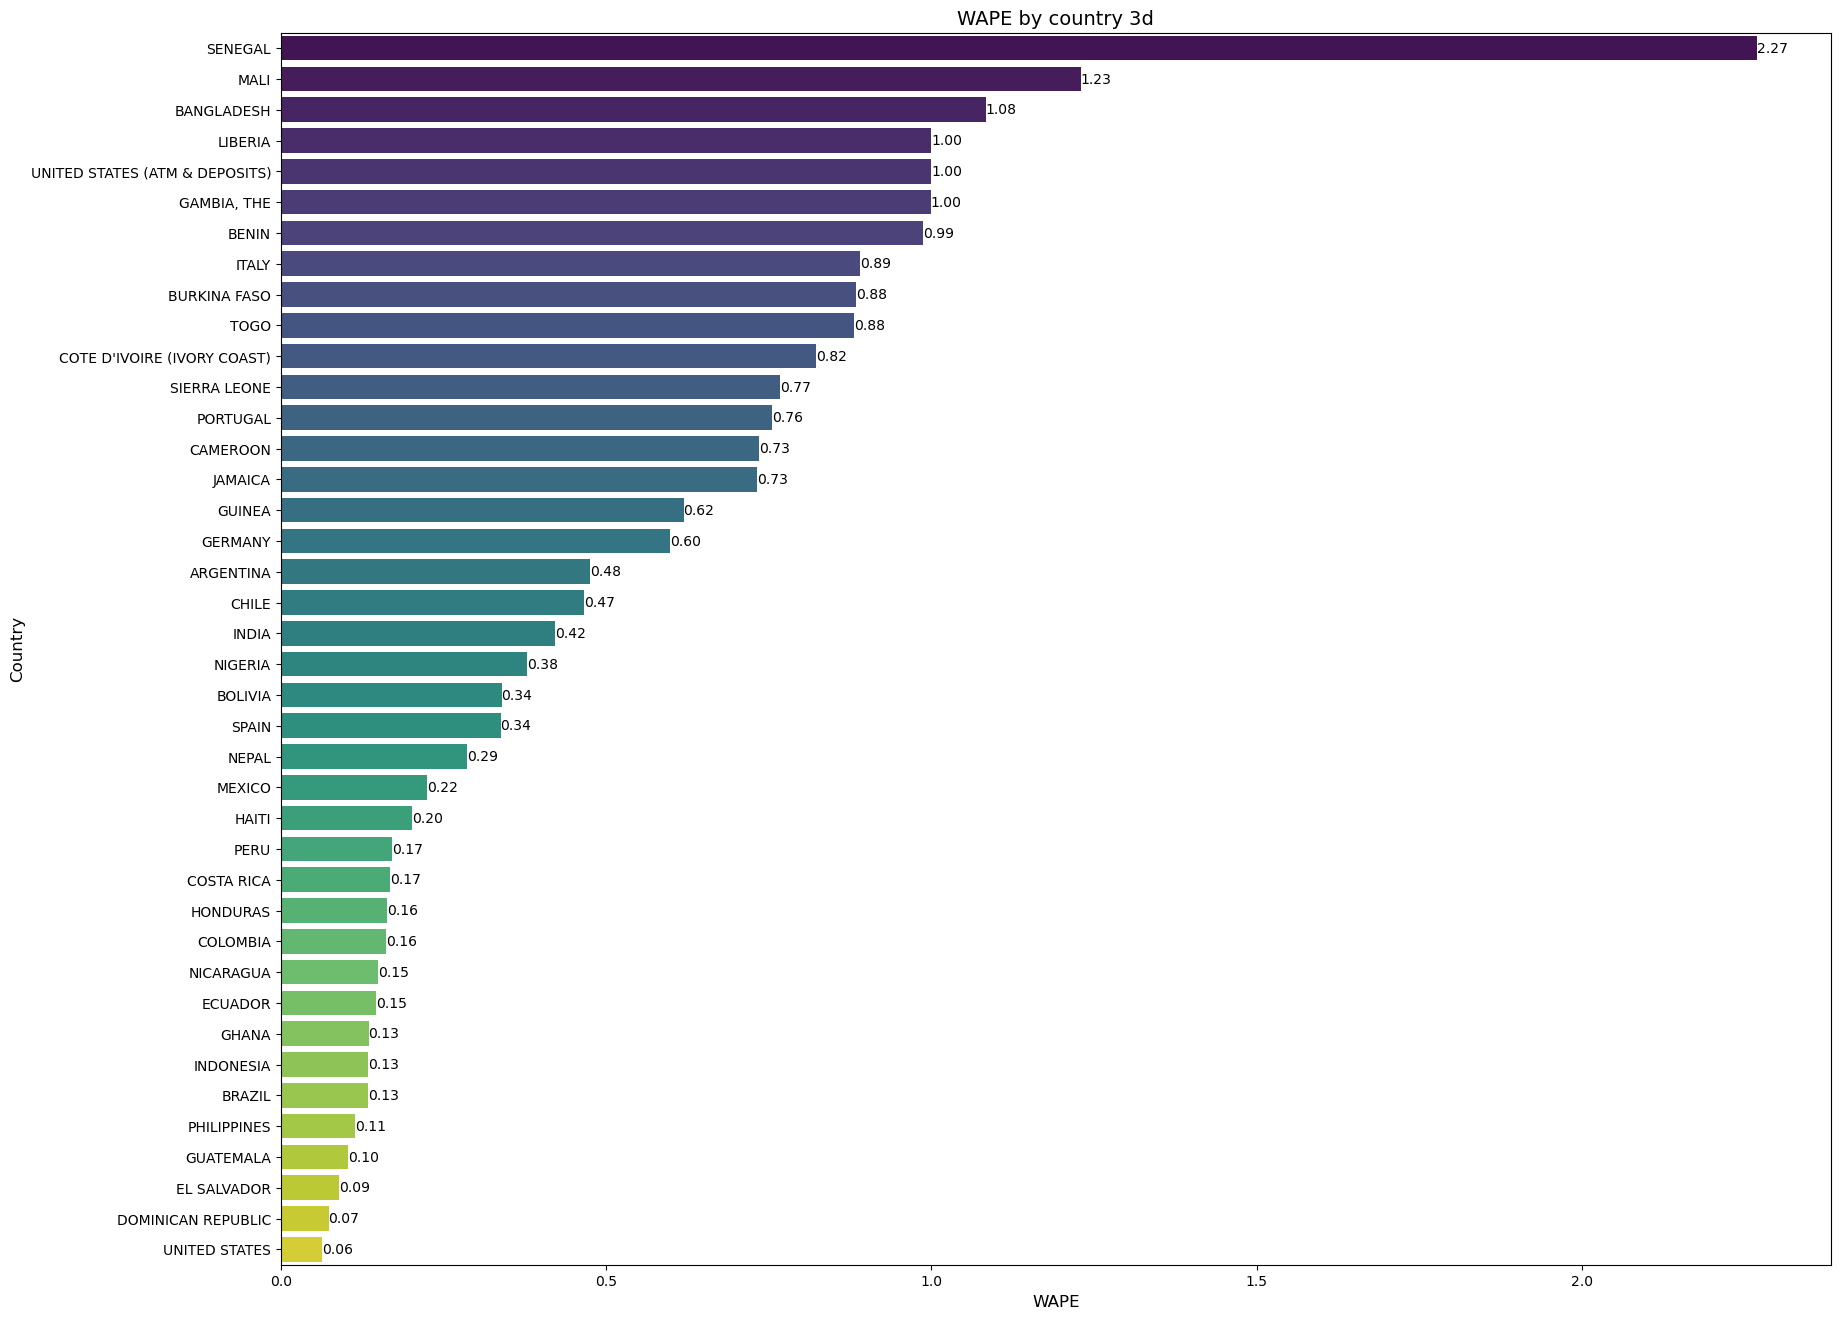

In [273]:
wape_country_f3d.sort_values('wape', inplace=True, ascending=False)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20,16))
bar_plot = sns.barplot(x='wape', y='country', data=wape_country_f3d, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('WAPE', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('WAPE by country 3d', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(wape_country_f3d['wape']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()

In [274]:
##MAPE A 7 DIAS##
###MAPE FORECAST 7 DÍAS##
forecast_7d=df_forecast_final

In [275]:
forecast_7d.shape

(722, 9)

In [276]:
forecast_7d["pe"] = abs((forecast_7d.amount - forecast_7d['mean']) / forecast_7d.amount)

In [277]:
forecast_7d.date.min(),forecast_7d.date.max()

(Timestamp('2023-09-11 00:00:00'), Timestamp('2023-09-17 00:00:00'))

In [278]:
##MAPE PROMEDIO A 7 D (para los que tienen MAPE definido)
forecast_7d["pe"] = abs((forecast_7d.amount - forecast_7d['mean']) / forecast_7d.amount)
forecast_7d.pe.mean()

0.5359404387185173

In [ ]:
##MAPE PROMEDIO A 7 DIAS POR PAYER

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


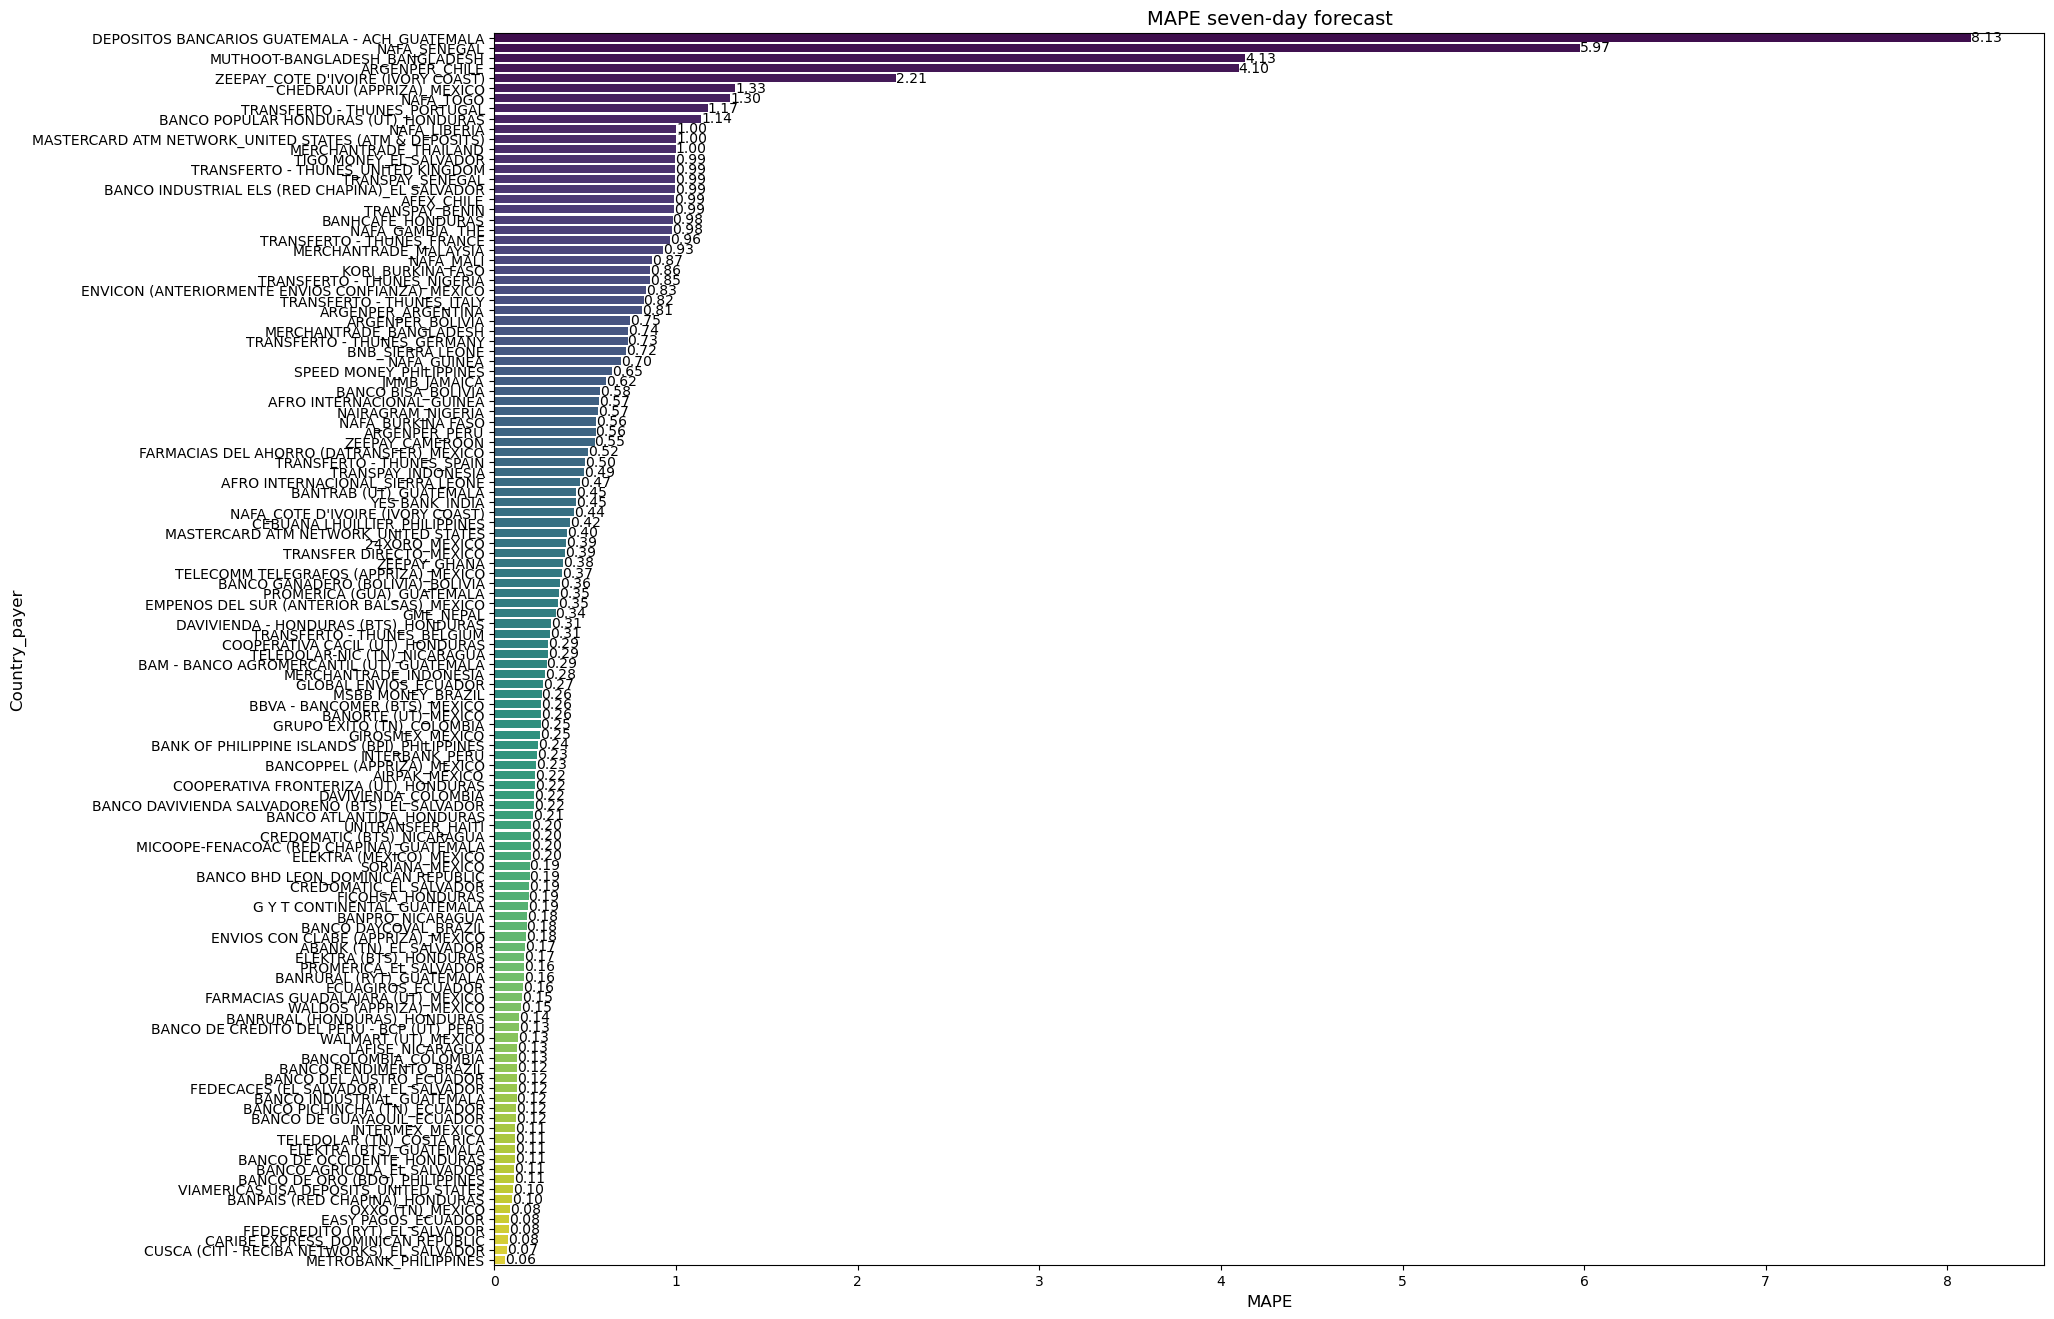

In [279]:
# Agrupar por 'payer_country' y calcular la suma de 'pe', luego ordenar por 'pe' de forma descendente
forecast_7d_payer_country = forecast_7d.groupby('payer_country')['pe'].mean().reset_index().sort_values(by='pe', ascending=False)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20,16))
bar_plot = sns.barplot(x='pe', y='payer_country', data=forecast_7d_payer_country, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('MAPE', fontsize=12)
plt.ylabel('Country_payer', fontsize=12)
plt.title('MAPE seven-day forecast', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(forecast_7d_payer_country['pe']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()

In [280]:
##FORECAST 7DIAS  MAPE PROMEDIO SIMPLE POR PAÍS##
forecast_7d_country = forecast_7d.groupby('country')['pe'].mean().reset_index()
forecast_7d_country=forecast_7d_country.sort_values('pe', ascending=False)

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


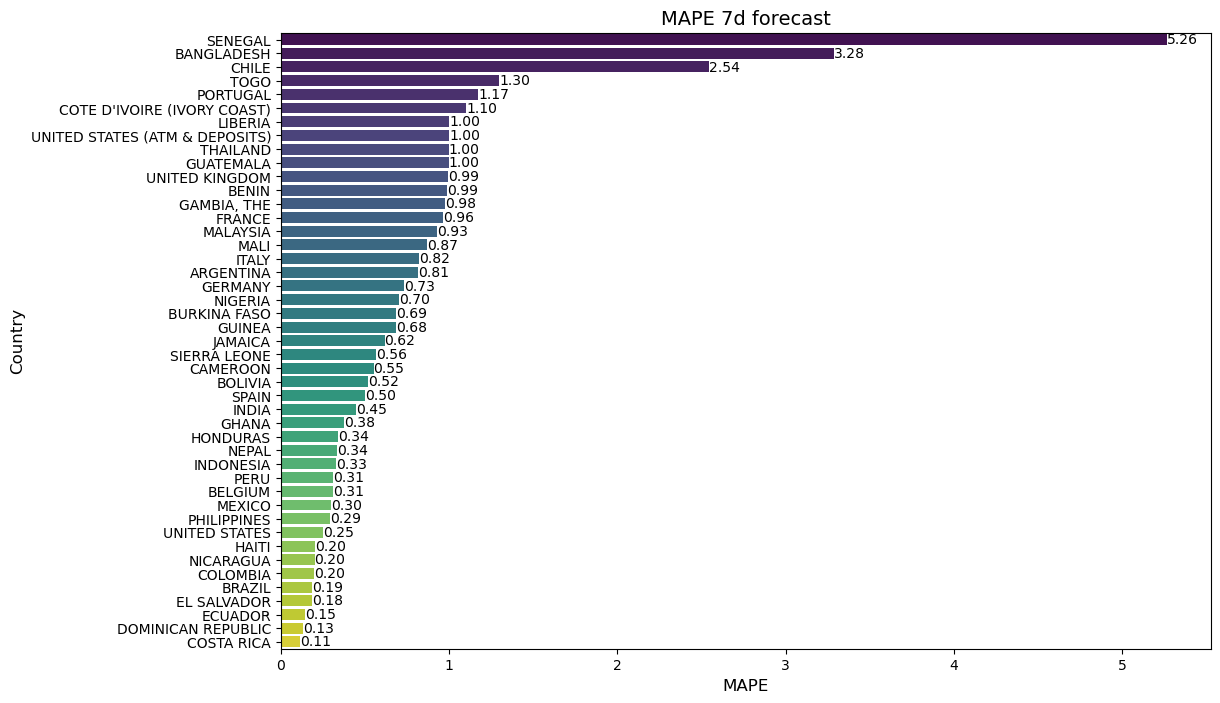

In [281]:
# Crear el gráfico de barras con seaborn
plt.figure(figsize=(12,8))
bar_plot = sns.barplot(x='pe', y='country', data=forecast_7d_country, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('MAPE', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('MAPE 7d forecast', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(forecast_7d_country['pe']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()

In [282]:
##WAPE A 7 DIAS GENERAL##
forecast_7d=df_forecast_final
forecast_7d["ae"] = abs((forecast_7d.amount - forecast_7d['mean']))
print(forecast_7d.ae.sum() / forecast_7d.amount.sum())

0.16319972754147616


In [ ]:
#WAPE POR PAISES A 7 DIAS

In [283]:
wape_country_f7d = forecast_7d.groupby('country').apply(lambda x: (x['ae'].sum() / x['amount'].sum())).reset_index(name='wape')

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


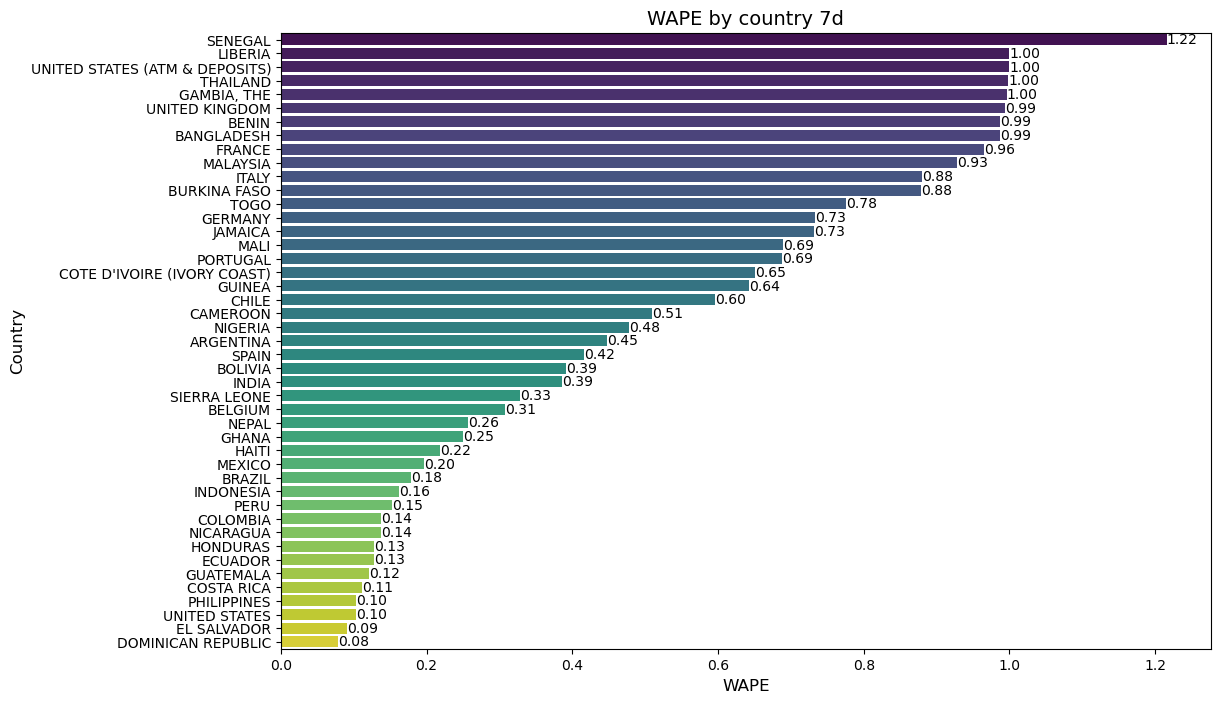

In [284]:
wape_country_f7d.sort_values('wape', inplace=True, ascending=False)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(12,8))
bar_plot = sns.barplot(x='wape', y='country', data=wape_country_f7d, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('WAPE', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('WAPE by country 7d', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(wape_country_f7d['wape']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()
